In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
units  = pd.read_csv('../final/unit_assignments.csv')
units.columns

Index(['uid', 'unit_no', 'start_date', 'end_date'], dtype='object')

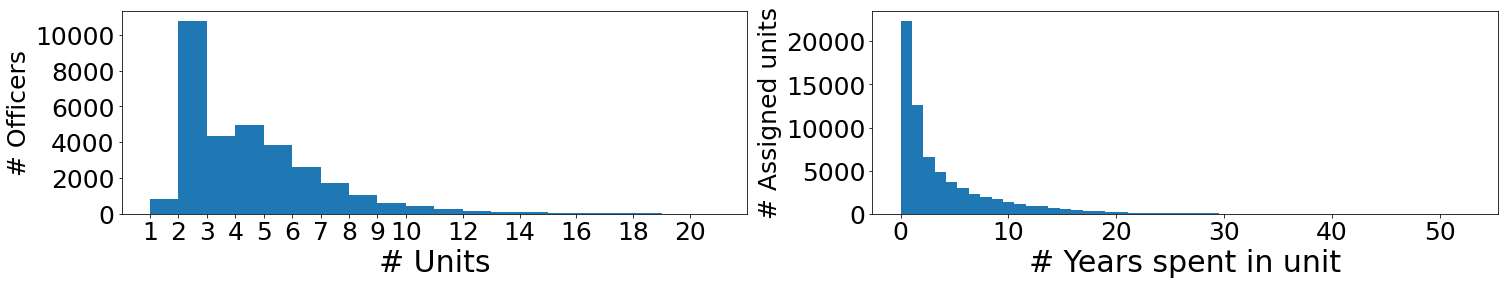

In [27]:
end_date = max(pd.to_datetime(units['end_date'].values)) # largest end date

history_profiles = {}
for uid in tqdm_notebook(set(units['uid'])):
    history_profiles[uid] = {}
    vals = units[units['uid'] == uid].values
    for v in vals:
        if np.isnan(v[1]):
            pass
        else:
            history_profiles[uid][int(v[1])] = v[2], v[3]
# np.save('history_profiles', history_profiles)
# history_profiles = np.load('../../derived_data/history_profiles.npy', allow_pickle=1).item()

# distribution of number of units/officer

a = [len(history_profiles[individual_officer]) for individual_officer in history_profiles]
plt.figure(figsize = (21,4))
plt.subplot(121)
plt.hist(a, bins = 20)
plt.xlabel('# Units', fontsize = 30)
plt.ylabel('# Officers', fontsize = 25)
# plt.xticks(np.arange(18)[::2], np.arange(1,19)[::2], fontsize = 25)
plt.yticks(fontsize = 25)
xticks_ = np.concatenate([np.arange(10), np.array([11, 13, 15, 17, 19])])
plt.xticks(xticks_, xticks_+1, fontsize = 25)


appointment_length = []
for officer in history_profiles:
    for unit in history_profiles[officer]:
        start_end = history_profiles[officer][unit]
        start, end = pd.to_datetime(start_end[0]), pd.to_datetime(start_end[1])
        if pd.isna(start):
            pass
        else:
            if pd.isna(end) == 0:
                duration= end-start
                appointment_length.append(duration.days)
            if pd.isna(end):
                appointment_length.append(-1)
appointment_length = np.array(appointment_length)
app_len = appointment_length[appointment_length>0]

plt.subplot(122)
plt.hist(app_len/365, bins = 50)
plt.xlabel('# Years spent in unit', fontsize = 30)
plt.ylabel('# Assigned units', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.tight_layout()
plt.savefig('../doc/figs/units_officers.pdf', bbox_inches = 'tight', dpi = 1000)
# plt.savefig('../doc/figs/units_officers.png', bbox_inches = 'tight', dpi = 100)
plt.show()